# Stead-State Error 

Suppose
$$G(s) = \dfrac{s+1}{s(s-1)(s+6)} = \dfrac{s+1}{s^3+5s^2-6s}.$$
Consider a system given by
$$\frac{Y(s)}{R(s)} = \frac{KG(s)}{1+KG(s)}.$$
We wish to find the steady state error for several reference inputs when $K=10$

## Step input

The transfer function of a feedback connection can be computed by
[`control.feedback(sys_forward, sys_backward)`](https://python-control.readthedocs.io/en/latest/generated/control.feedback.html)


      s + 1
-----------------
s^3 + 5 s^2 - 6 s


      10 s + 10
----------------------
s^3 + 5 s^2 + 4 s + 10



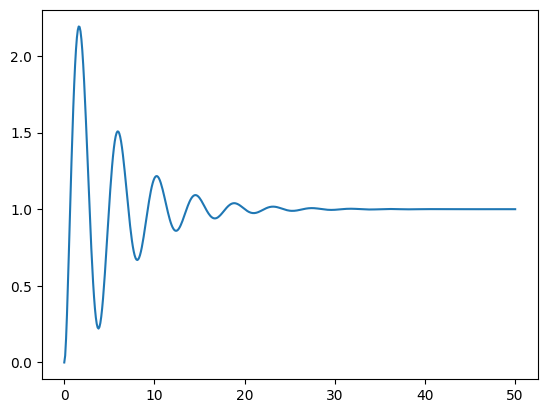

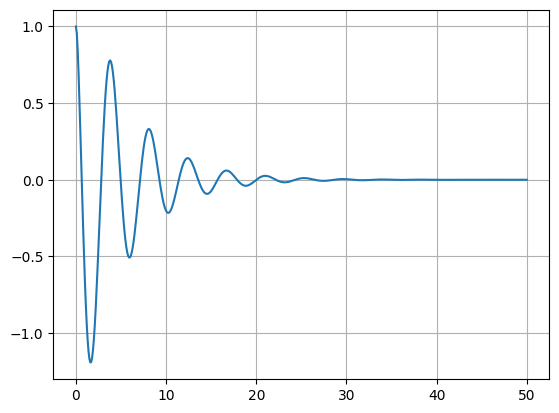

In [10]:
import control
import numpy as np
import matplotlib.pyplot as plt

sysG = control.tf([1, 1], [1, 5, -6, 0])
print(sysG)
K = 10
sysYR = control.feedback(K * sysG, 1)
print(sysYR)

t = np.linspace(0, 50, 501)
t, y_step = control.step_response(sysYR, t)

plt.plot(t, y_step)

e_step = 1 - y_step
plt.figure()
plt.plot(t, e_step)
plt.grid()

## Ramp Input

So far, we studied the following commands to simulate time-response

* [control.impulse_response](https://python-control.readthedocs.io/en/0.8.1/generated/control.impulse_response.html)
* [control.step_response](https://python-control.readthedocs.io/en/0.8.1/generated/control.step_response.html)

The system response to an arbitrary control input can be computed by

* [control.forced_response](https://python-control.readthedocs.io/en/0.8.1/generated/control.forced_response.html)


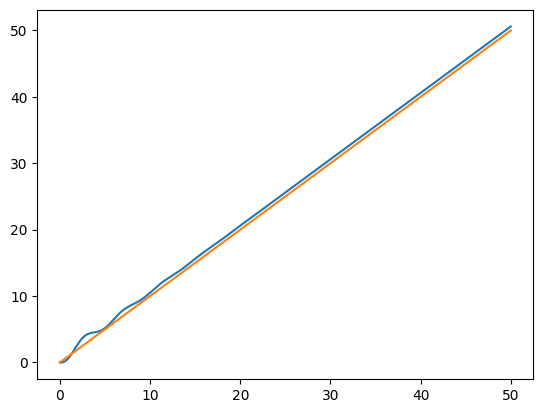

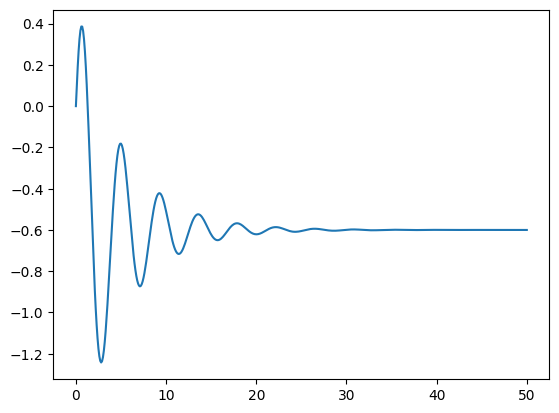

In [14]:
r = t
t, y_ramp = control.forced_response(sysYR, t, r)
plt.plot(t, y_ramp, t, r)

e_ramp = r - y_ramp
plt.figure()
plt.plot(t, e_ramp)